# Predicting Academic Performance of Students on a Final Exam

### Problem Statement

Academic performance is an important factor and sign of long term success in professional and even personal success. As a result, many students, parents, and educators alike across all education stages are invested in a student's performance in the classroom. For my final project, I am creating a model that can predict a student's final exam performance based on several factors: age, gender, hours spent studying, hours spent on social media, Netflix hours, whether or not they had a part time job, attendance, hours of sleep, quality of diet, frequency of exercise, education level of parents, quality of internet, mental health rating, and extracirricular participation. By analyzing these factors, we will be able to uncover the correlation between variables that influence strong academic performance.  

This model can be useful for anyone in education, such as students, teachers, parents, counselors, or schools that are hoping to use data-driven information to improve student performance by providing resources and support like time management advice, mental health support, and academic policy changes. Ultimately, this model will assist in strengthening academic performance amongst students, as well as supporting educators to support students in effective ways to promote greater academic success.

### Dataset Description:
The dataset for this project is from Kaggle in csv format. It provides comprehensive data from 1000 students looking at academic perfomance from grades on a final exam and its correlation with different variables. Our data may require some cleaning if there are any unnecessary columns and null values. It may be challenging to accurately construct a regression model since there are many factors involved, including innate student differences not accounted for in the dataset, however, other factors should be more impactful and significant in predicting final exam performance that the results will be accurate enough to use.



### Data Pre-processing and Preliminary Examination

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [ ]:
#load dataset
students = pd.read_csv('student_habits_performance.csv')
df = pd.DataFrame(students)
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
#check for missing values in the dataset
print(df.isna().sum())
print(df.isna().any().any())

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64
True


In [ ]:
#drop rows with null values in parental educational level
df = df.dropna(subset=['parental_education_level'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     909 non-null    object 
 1   age                            909 non-null    int64  
 2   gender                         909 non-null    object 
 3   study_hours_per_day            909 non-null    float64
 4   social_media_hours             909 non-null    float64
 5   netflix_hours                  909 non-null    float64
 6   part_time_job                  909 non-null    object 
 7   attendance_percentage          909 non-null    float64
 8   sleep_hours                    909 non-null    float64
 9   diet_quality                   909 non-null    object 
 10  exercise_frequency             909 non-null    int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               909 non-null    object 


In [ ]:
df['age'].min()

17

In [ ]:
df['age'].max()

24

In [ ]:
df['age'].mean()

np.float64(20.475247524752476)

In [ ]:
df['study_hours_per_day'].min()

0.0

In [ ]:
df['study_hours_per_day'].max()

8.3

In [ ]:
df['social_media_hours'].min()

0.0

In [ ]:
df['social_media_hours'].max()

7.2

In [ ]:
df['netflix_hours'].min()

0.0

In [ ]:
df['netflix_hours'].max()

5.4

In [ ]:
df['attendance_percentage'].min()

56.0

In [ ]:
df['attendance_percentage'].max()

100.0

In [ ]:
df['sleep_hours'].min()

3.2

In [ ]:
df['sleep_hours'].max()

10.0

In [ ]:
df['exercise_frequency'].min()

0

In [ ]:
df['exercise_frequency'].max()

6

In [ ]:
df['mental_health_rating'].min()

1

In [ ]:
df['mental_health_rating'].max()

10

The dataset I am working with consists of 909 students between the ages of 17 to 24. They vary in hours spent on studying (0 to 8.3 hours), Netflix (0 to 5.4 hours), social media (0 to 7.2 hours), sleep (3.2 to 10 hours), and have diffrerent percentages of attendance (50% to 100%), exercise frequency (0 to 6) and mental health ratings (1 to 10).


### Exploratory Data Analysis

In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Descriptive Statistics

In [ ]:
#mean final exam grade
df['exam_score'].mean()

np.float64(69.55819581958195)

In [ ]:
#median final exam grade
df['exam_score'].median()

70.4

In [ ]:
#minimum score
df['exam_score'].min()

18.4

In [ ]:
#maximum score
df['exam_score'].max()

100.0

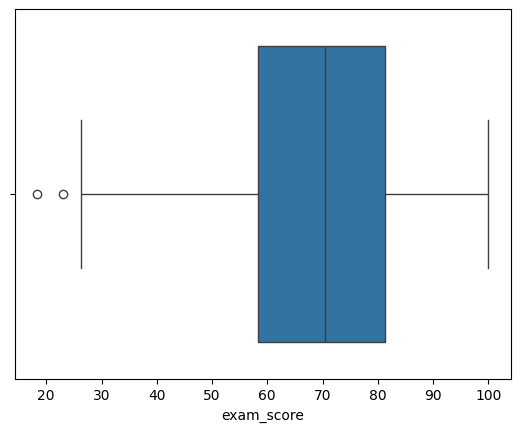

In [ ]:
#box and whisker plot of scores
sns.boxplot(x=df['exam_score'])
plt.show()

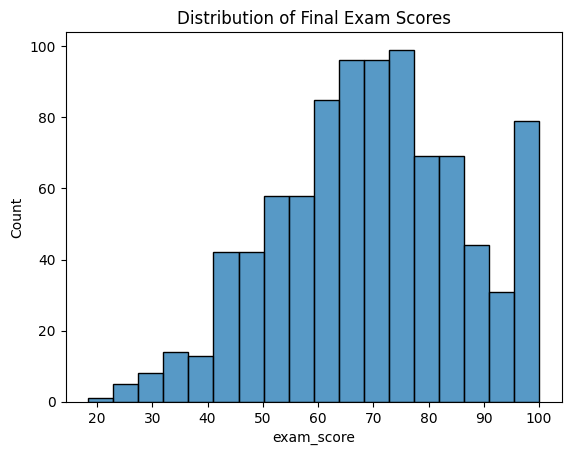

In [ ]:
#histogram of scores
sns.histplot(x=df['exam_score'])
plt.title('Distribution of Final Exam Scores')
plt.show()

Based on the above graphs and descriptive statistics, we can see that the mean of scores is slightly less than the median, showing that the data is slightly skewed left. This is supported by the histogram of the scores showing that there are a few very low values that are dragging the mean down, while most values are near the higher end.

### Initial Visualizations

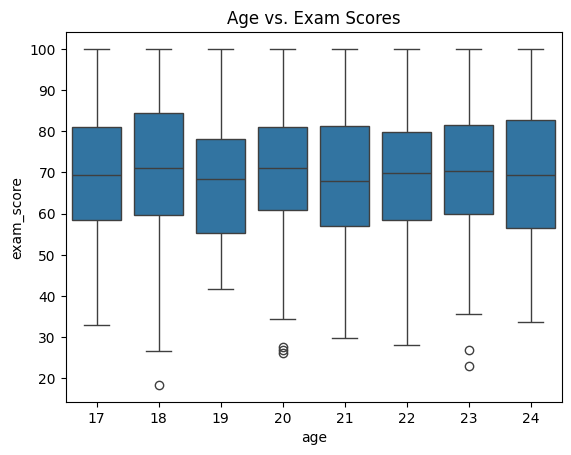

In [ ]:
#plot age aganist age and scores
sns.boxplot(x=df['age'], y=df['exam_score'])
title = plt.title('Age vs. Exam Scores')

This boxplot illustrates the distribution of exam scores across different student age groups, ranging from 17 to 24 years old. The median exam score remains relatively consistent across ages, hovering around 70 to 75 for most groups. The interquartile ranges (middle 50% of scores) are also similar, typically spanning from the mid-50s to the high 80s, suggesting a stable performance level regardless of age. However, the 18-year-old group appears to have a slightly higher median and a wider spread toward the top, potentially indicating more high-performing students in that age group. A few outliers,particularly among ages 18, 19, 20, and 23, show exam scores in the low 20s, but these are not representative of the broader trend. Overall, the plot suggests that age does not have a strong influence on exam performance within this college-age range.

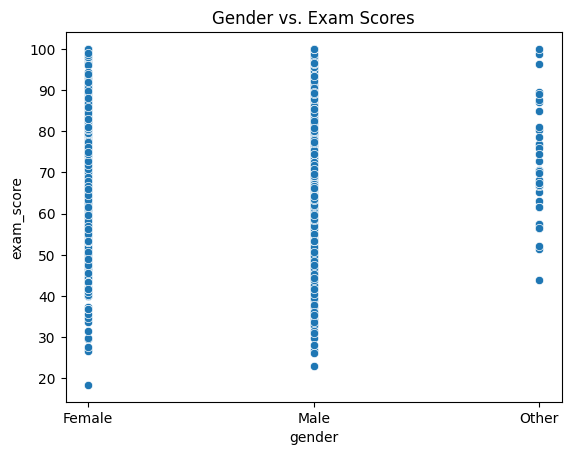

In [ ]:
#plot gender aganist scores
sns.scatterplot(x=df['gender'], y=df['exam_score'])
title = plt.title('Gender vs. Exam Scores')

This scatterplot visualizes the distribution of exam scores across gender categories: Female, Male, and Other. Each dot represents an individual student's score. The data shows that all three gender groups span nearly the full range of scores, from around 20 to 100. Female and Male students appear to have a similar vertical spread of scores, with many clustered between 60 and 90. The Other category has fewer data points but also shows a broad range, including multiple students scoring above 90. Overall, there is no clear performance gap between genders based on this visualization, and exam performance appears to be relatively consistent across gender identities. This suggests that gender is not a strong predictor of exam outcomes in this dataset.

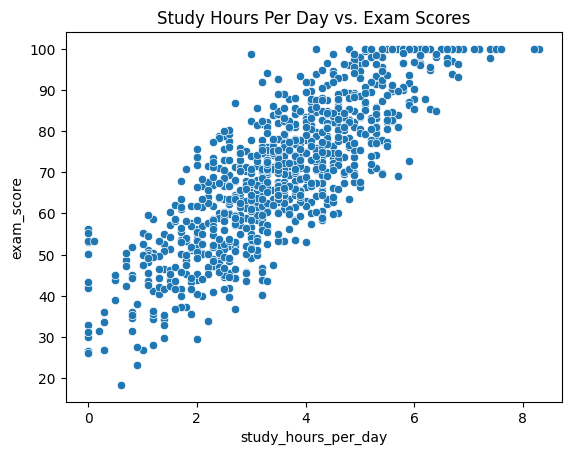

In [ ]:
#plot study hours per day aganist scores
sns.scatterplot(x=df['study_hours_per_day'], y=df['exam_score'])
title = plt.title('Study Hours Per Day vs. Exam Scores')

This scatterplot illustrates the relationship between the number of hours students study per day and their exam scores. There is a strong, linear, positive correlation that as study hours increase, exam scores also tend to rise. Most students who study between 3 and 6 hours per day score between 70 and 100, while those who study less than 2 hours often score below 70. The concentration of data points forms a strong upward slope, suggesting that increased study time is associated with better academic performance. Additionally, very few students who study more than 6 hours per day score below 80, supporting the idea that higher study commitment correlates with higher exam outcomes. This plot shows one of the strongest and most consistent relationships among the variables observed, highlighting study time as a key predictor of academic success.

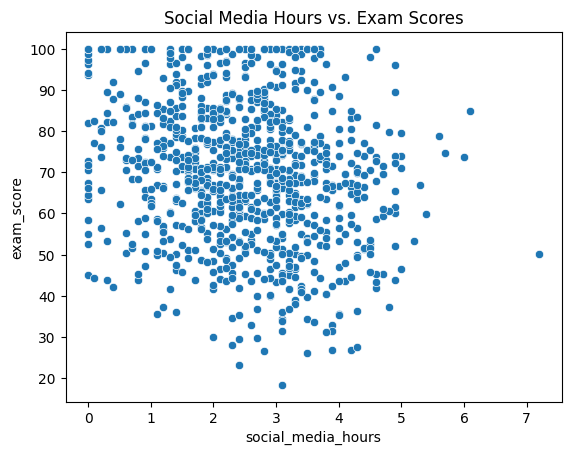

In [ ]:
#plot social media hours aganist scores
sns.scatterplot(x=df['social_media_hours'], y=df['exam_score'])
title = plt.title('Social Media Hours vs. Exam Scores')

This scatterplot displays the relationship between students’ daily social media usage (in hours) and their exam scores. Most students fall within the 0 to 5 hour range of social media use, with a dense cluster between 2 to 3 hours. Exam scores across this group are widely distributed, but the majority lie between 60 and 80. Notably, some students with 0 to 1 hour of social media still score below 50, while others reach perfect scores (100) — indicating that low social media use does not guarantee high performance. Similarly, students with 5 or more hours of social media generally have fewer high scores, suggesting a potential negative impact of excessive usage. While there's no strong linear correlation, there is a slight downward trend: higher social media use appears loosely associated with lower exam score ceilings. This implies that moderate to high social media usage may reduce the likelihood of top academic performance, though it’s not the sole determining factor.

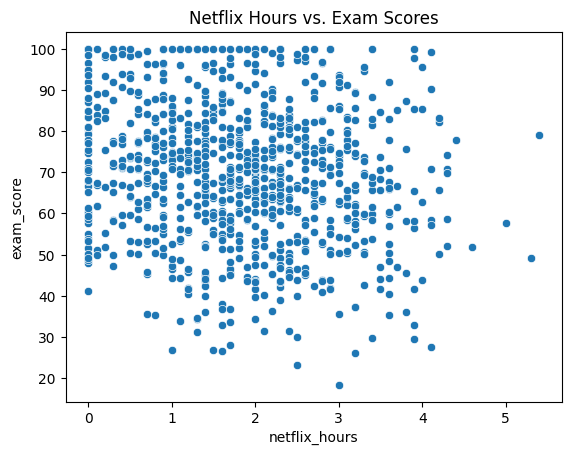

In [ ]:
#plot netflix hours aganist scores
sns.scatterplot(x=df['netflix_hours'], y=df['exam_score'])
title = plt.title('Netflix Hours vs. Exam Scores')

This scatterplot shows the relationship between students’ daily Netflix usage (in hours) and their exam scores. Most students report watching between 0 and 3 hours of Netflix per day, with a dense concentration between 1 and 2 hours. Exam scores in this range vary widely, typically falling between 50 and 90, and a noticeable number of students still reach the maximum score of 100, regardless of Netflix consumption. However, beyond 3 hours of Netflix viewing per day, exam scores begin to spread more thinly and appear less consistent, with fewer students achieving high scores. Students who watch 4 or more hours generally score between 40 and 80, suggesting a potential negative association between excessive Netflix usage and top academic performance. That said, the scatter remains diffuse, indicating no strong linear correlation overall. Like social media, Netflix consumption may influence academic success, but it is likely just one of several contributing factors.

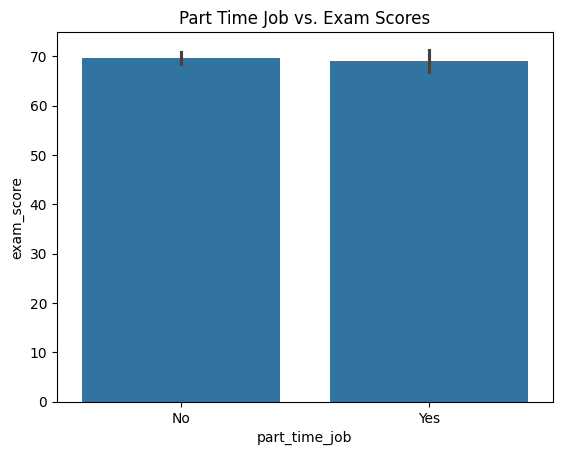

In [ ]:
#plot part time job aganist scores
sns.barplot(x=df['part_time_job'], y=df['exam_score']);
title = plt.title('Part Time Job vs. Exam Scores')

This bar chart compares the average exam scores of students who have a part-time job versus those who do not. Students without a part-time job have a slightly higher average exam score, around 70, compared to those with a part-time job, who average just under 70. The difference between the two groups is relatively small, and the overlapping error bars suggest that the gap may not be statistically significant. This indicates that having a part-time job does not dramatically impact academic performance, although there may be a slight academic advantage for students who are not balancing work with school responsibilities. Further analysis would be needed to determine whether other factors—like study habits or time management—interact with job status to affect performance.


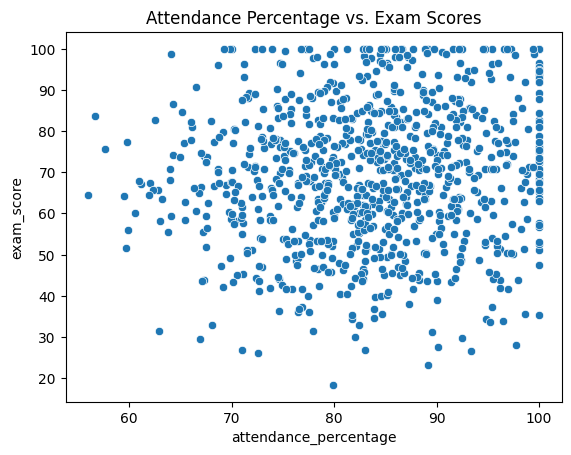

In [ ]:
#plot attendance percentage aganist scores
sns.scatterplot(x=df['attendance_percentage'], y=df['exam_score']);
title = plt.title('Attendance Percentage vs. Exam Scores')

This scatterplot examines the relationship between students' attendance percentage and their exam scores, which shows a weak upward trend. Students with attendance above 90% show a wide range of scores from around 40 to 100, indicating that high attendance alone does not guarantee top performance. Similarly, students with attendance between 60% and 80% also show varied results, with some scoring above 90. However, there is a slight clustering of lower scores below 70 among those with attendance below 75%, which suggests that very low attendance may correlate with reduced performance. Overall, although high attendance might be a necessary component of academic success, it is clearly not sufficient on its own, and other factors like study habits or mental health may play more significant roles.

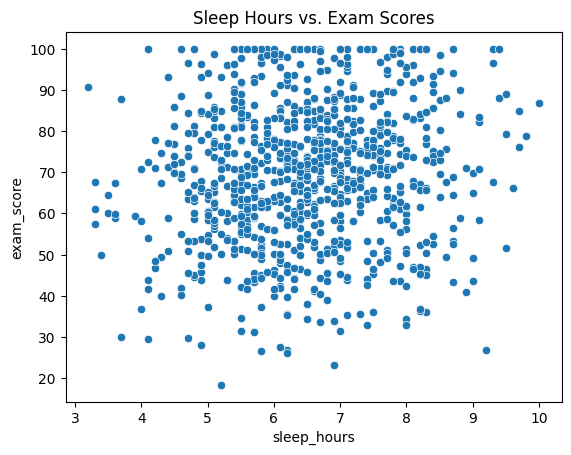

In [ ]:
#plot sleep hours aganist scores
sns.scatterplot(x=df['sleep_hours'], y=df['exam_score']);
title = plt.title('Sleep Hours vs. Exam Scores')

This scatterplot shows the relationship between students' average sleep hours per night and their exam scores. The majority of students report sleeping between 5 and 8 hours, with exam scores in this range spread widely from about 40 to 100. There is no clear linear trend in the data, indicating that sleep alone is not a strong predictor of academic performance in this sample. However, students who sleep fewer than 5 hours or more than 9 hours tend to be less common and show slightly more scattered performance, suggesting that extremely low or high sleep may not be optimal. Overall, while moderate sleep (6–8 hours) appears most common among students with average to high exam scores, the data does not support a direct or strong correlation between sleep duration and academic outcomes, and other lifestyle or behavioral factors may play a more dominant role.

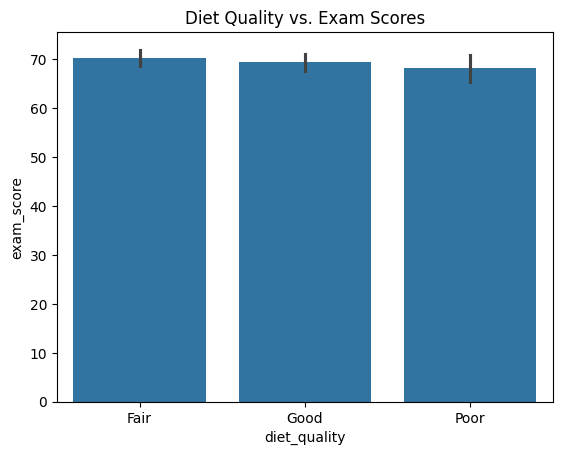

In [ ]:
#plot diet quality aganist scores
sns.barplot(x=df['diet_quality'], y=df['exam_score']);
title = plt.title('Diet Quality vs. Exam Scores')

This bar chart compares average exam scores aganist different levels of reported diet quality: Poor, Fair, and Good. Interestingly, students who rated their diet as "Fair" have the highest average exam score, slightly above 70. Those with “Good” and “Poor” diet quality both have slightly lower averages, just under 70. The differences between the groups are minimal, and the error bars show considerable overlap, suggesting that the variation may not be statistically significant. This implies that diet quality, may not be a strong individual predictor of exam performance. However, it may still interact with other factors like sleep or exercise to influence academic outcomes.

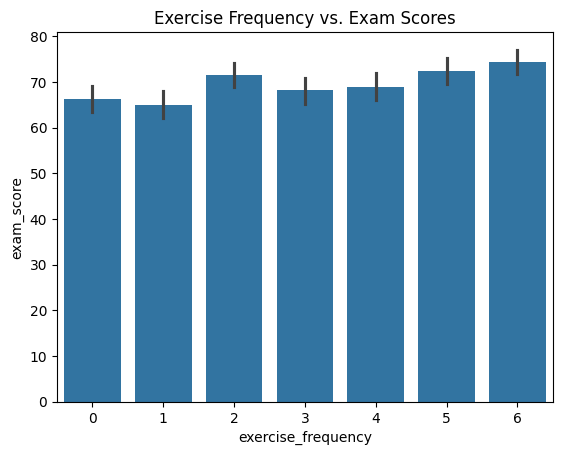

In [ ]:
#plot exercise frequency aganist scores
sns.barplot(x=df['exercise_frequency'], y=df['exam_score']);
title =  plt.title('Exercise Frequency vs. Exam Scores')

This bar chart shows the average exam scores for students based on how many days per week they exercise. There is a clear upward trend that students who exercise more frequently tend to score higher on their exams. Those who do not exercise at all average around 66, while students who exercise six days a week average above 74. There is some fluctuation in the middle, but overall the scores increase with more exercise. This suggests a possible link between physical activity and academic performance, with regular exercise potentially supporting students to have better focus, energy, or time management.

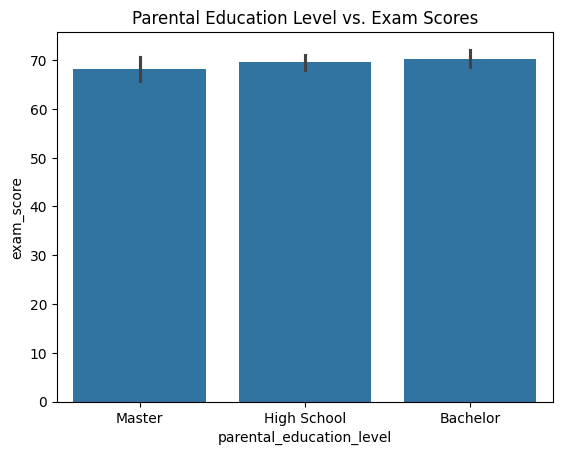

In [ ]:
#plot parental education level aganist scores
sns.barplot(x=df['parental_education_level'], y=df['exam_score']);
title = plt.title('Parental Education Level vs. Exam Scores')

This bar chart compares student average exam scores based on their parents’ highest level of education. Students whose parents have a bachelor’s degree have the highest average score, followed closely by those whose parents completed high school. Students whose parents hold a master’s degree have a slightly lower average than the other two groups. However, the differences are small, and the error bars overlap, suggesting that parental education level does not strongly affect exam performance in this dataset. This indicates that while parental background may play a role in shaping academic environments, it does not appear to be a major factor in determining student outcomes here.

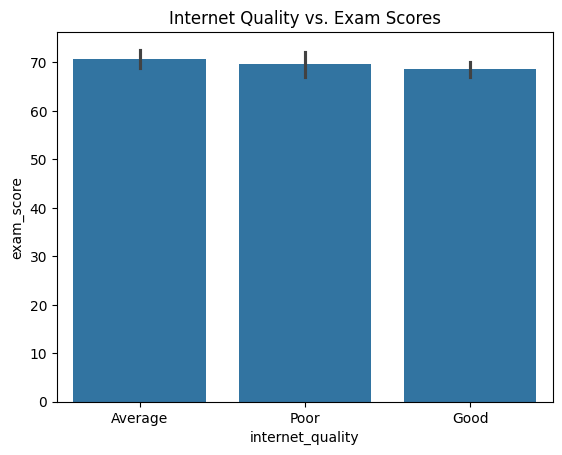

In [ ]:
#plot internet quality aganist scores
sns.barplot(x=df['internet_quality'], y=df['exam_score']);
title = plt.title('Internet Quality vs. Exam Scores')

This bar chart shows the average exam scores of students based on their reported internet quality: Poor, Average, and Good. Surprisingly, students with average internet quality have the highest average exam scores, followed closely by those with poor internet. Students with good internet report slightly lower average scores. The differences among the three groups are small, and the overlapping error bars suggest that internet quality does not have a strong or consistent impact on academic performance in this dataset. This may indicate that while internet access is important for completing assignments or accessing resources, its perceived quality does not significantly affect exam outcomes when other factors are also in play.

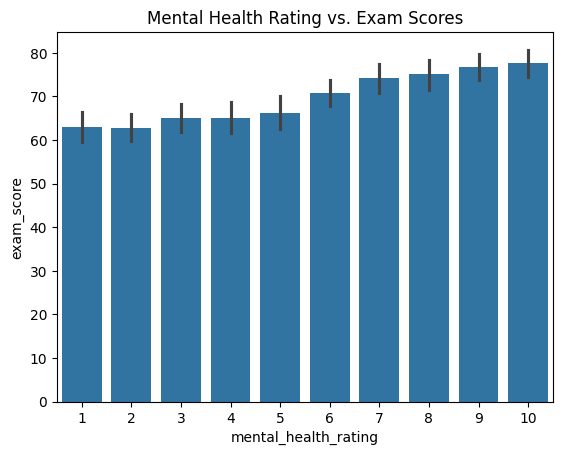

In [ ]:
#plot mental health rating aganist scores
sns.barplot(x=df['mental_health_rating'], y=df['exam_score']);
title = plt.title('Mental Health Rating vs. Exam Scores')

This bar chart displays average exam scores based on students' self-rated mental health, with ratings ranging from 1 (lowest) to 10 (highest). There is a clear upward trend: as mental health ratings increase, so do average exam scores. Students who rated their mental health between 1 and 5 tend to score in the mid-60s on average, while those who rated it a 10 score close to 80. The steady rise suggests a strong positive relationship between well-being and academic performance. This pattern highlights the importance of supporting students' mental health, as better mental well-being appears to be associated with higher academic outcomes.

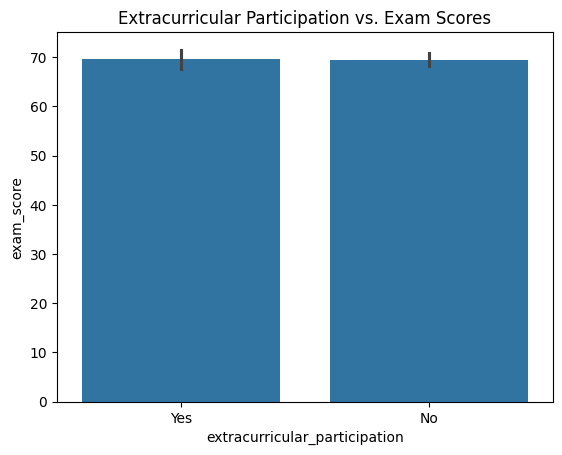

In [ ]:
#plot extracirricular participation aganist scores
sns.barplot(x=df['extracurricular_participation'], y=df['exam_score']);
title = plt.title('Extracurricular Participation vs. Exam Scores')

This bar chart compares the average exam scores of students who participate in extracurricular activities with those who do not. The average scores for both groups are nearly identical, around 70. The small difference between the bars and the overlapping error bars suggest that participation in extracurriculars does not have a significant impact on exam performance in this dataset. This may indicate that students are able to balance their academics with outside commitments effectively, or that other factors such as study habits or mental health play a larger role in academic outcomes.

## Modeling and Intrepretations

In order to predict exam scores, I am using multiple different regression models in order to test and see which performs best for pedicting exam scores by taking into account the multiple variables that affect student performance. For the models, I will be using a 80-20 train test split to train the system on 80% of the data and testing it on the remaining 20%.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

Baseline Model

I will be evaluating each model by comparing the MSE (mean square error) with the baseline MSE to look at which performed best. The baseline value was calculated by taking the mean of exam scores.

In [ ]:
#set up baseline model using mean exam score, calculate baseline mse
y = df['exam_score']
baseline_preds = np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_preds)

286.2905076360221

Multiple Linear Regression Model

I chose to build a multiple linear regression model because I wanted to understand how different daily habits and conditions—like study hours, sleep, mental health, and attendance—might impact a student’s exam performance. Academic success usually depends on more than just one factor, so using multiple predictors allowed me to look at how these variables interact and contribute together. This allowed me explore the combined influence of lifestyle and behavioral factors on exam scores, rather than just focusing on a single one.

In [ ]:
#create X & y, split into training and testing data
X = df[['age','gender','study_hours_per_day','social_media_hours','netflix_hours','part_time_job','attendance_percentage','sleep_hours','diet_quality','exercise_frequency','parental_education_level','internet_quality','mental_health_rating','extracurricular_participation']]
y = df['exam_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#one hot encoder categorical columns
cat_col = ['gender','part_time_job','diet_quality','parental_education_level','internet_quality','extracurricular_participation']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [ ]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])

In [ ]:
#fit pipeline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('model', LinearRegression())])

In [ ]:
#find coefficients
lr = pipe.named_steps['model']
coefficients = lr.coef_
names = transformer.get_feature_names_out()
pd.DataFrame(coefficients, names)

,0
onehotencoder__gender_Male,-0.112202
onehotencoder__gender_Other,0.039969
onehotencoder__part_time_job_Yes,0.414216
onehotencoder__diet_quality_Good,-0.674464
onehotencoder__diet_quality_Poor,-0.010574
onehotencoder__parental_education_level_High School,-0.207244
onehotencoder__parental_education_level_Master,-0.201009
onehotencoder__internet_quality_Good,-0.350748
onehotencoder__internet_quality_Poor,-0.335639
onehotencoder__extracurricular_participation_Yes,-0.391152


In [ ]:
#find y-int
lr.intercept_

np.float64(5.348113672205258)

In [ ]:
#calculate mse for training data
y_train_preds = pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

28.21755753462292

In [ ]:
#calculate mse for testing data
y_test_preds = pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

30.01405612690664

In [ ]:
#determine most significant factors
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
age,-0.000152
gender,-0.000052
study_hours_per_day,1.302463
social_media_hours,0.071653
netflix_hours,0.045714
part_time_job,-0.000073
attendance_percentage,0.012346
sleep_hours,0.047704
diet_quality,0.001520
exercise_frequency,0.050951


Overall, my multiple linear regression model performed much better than the baseline. Both the training and testing MSE values were significantly lower than the baseline MSE, with the training data performing slightly better. This suggests that the model was able to capture meaningful patterns in the data without overfitting. Unlike the baseline model, which predicted the average exam score for every student, the regression model was able to use individual behavioral and lifestyle features to make more accurate predictions. According to the permutation importance results, the most significant predictor was study hours per day, followed by mental health rating. Social media use, Netflix hours, and sleep had smaller but still positive impacts. Variables such as age, gender, and extracurricular participation were the least important in this model.

KNN Regression Model

I decided to try using k-nearest neighbors (KNN) regression because it makes predictions based on how similar one data point is to others in the dataset. Since student performance can sometimes be influenced by clusters of similar behaviors, I wanted to see if students with similar behaviors across several factors, such as students with similar study habits, sleep patterns, or mental health ratings, would have similar exam performance. I wanted to see if KNN could pick up on those localized patterns, and model that better than with a linear relationship.

In [ ]:
#create X & y, split into training and testing data
X = df[['age','gender','study_hours_per_day','social_media_hours','netflix_hours','part_time_job','attendance_percentage','sleep_hours','diet_quality','exercise_frequency','parental_education_level','internet_quality','mental_health_rating','extracurricular_participation']]
y = df['exam_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#encode categorical column & scale data
cat_col = ['gender','part_time_job','diet_quality','parental_education_level','internet_quality','extracurricular_participation']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = StandardScaler())

In [ ]:
#create pipeline for knn regression model
pipe = Pipeline([('encode', transformer), ('model', KNeighborsRegressor())])

In [ ]:
#define grid of hyperparameters for number of neighbors
param_grid = {'model__n_neighbors': [3, 5, 7, 10, 15, 20, 25, 30, 50]}

In [ ]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['gender',
                                                                          'part_time_job',
                                                                          'diet_quality',
                                                                          'parental_education_level',
                                                                          'internet_quality',
                                                                          'extracurricular_participation'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [3, 5, 7, 10, 15, 20, 25, 30,
                                                50]},
             scoring='neg_mean_squared_error')

In [ ]:
#determine best parameter
grid_search.best_params_

{'model__n_neighbors': 10}

In [ ]:
#use 10 neighbors in model
knn = grid_search.best_estimator_

In [ ]:
#calculate mse for training data
y_train_preds = knn.predict(X_train)
mean_squared_error(y_train, y_train_preds)

62.16282819807427

In [ ]:
#calculate mse for testing data
y_test_preds = knn.predict(X_test)
mean_squared_error(y_test, y_test_preds)

78.73517692307689

In [ ]:
#determine feature importance
r = permutation_importance(knn, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
age,-0.006069
gender,-0.004366
study_hours_per_day,0.795999
social_media_hours,0.041004
netflix_hours,0.036306
part_time_job,-0.004585
attendance_percentage,-0.008332
sleep_hours,0.026518
diet_quality,-0.002008
exercise_frequency,0.032523


My KNN model did not outperform the multiple linear regression model but it still performed significantly better than the baseline. The training error was slightly lower than the testing error, which suggests a moderate degree of generalization but also hints at some possible overfitting. KNN's ability to capture non-linear relationships between features may have helped it find some patterns in student behavior that a linear model could miss. I also used grid search to tune the number of neighbors, which likely improved the model's ability to balance bias and variance.

In this model, the most important predictor remained study hours per day, followed by mental health rating. Features like social media usage and sleep also contributed slightly, while variables like extracurricular participation, diet quality, and attendance had little to no impact on the model’s predictions.

Decision Tree Regression Model

I chose to implement a decision tree regression model because it is able to capturing non-linear relationships within the data, which seems to affect student performance. Unlike linear models, decision trees are capable of modeling interactions between features without requiring assumptions about the underlying data distribution. Additionally, decision trees are highly interpretable, so we can look at how each factor contributes to exam scores, and looking at which factors most strongly influence performance









In [ ]:
#create X & y, split into training and testing data
X = df[['age','gender','study_hours_per_day','social_media_hours','netflix_hours','part_time_job','attendance_percentage','sleep_hours','diet_quality','exercise_frequency','parental_education_level','internet_quality','mental_health_rating','extracurricular_participation']]
y = df['exam_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#encode categorical column
cat_col = ['gender','part_time_job','diet_quality','parental_education_level','internet_quality','extracurricular_participation']
ohe = OneHotEncoder(sparse_output = False)
encoder = make_column_transformer((ohe,cat_col), verbose_feature_names_out = False, remainder = 'passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

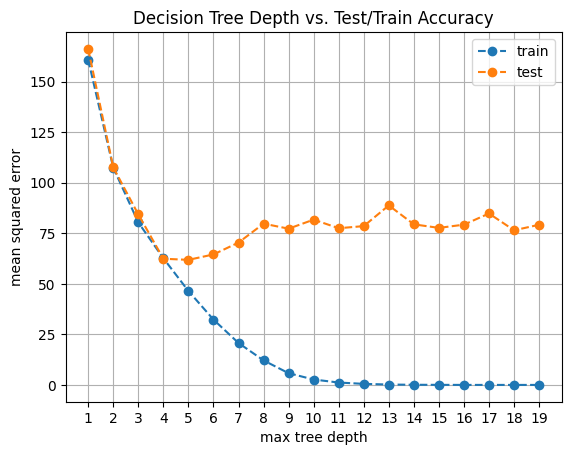

In [ ]:
#find the optimal max depth while avoiding overfitting by plotting the test accuracies & finding the minimum one
train_scores = []
test_scores = []
for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth = d).fit(X_train_encoded, y_train)
    y_train_preds = dtree.predict(X_train_encoded)
    y_test_preds = dtree.predict(X_test_encoded)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

plt.plot(range(1, 20), train_scores, '--o', label = 'train')
plt.plot(range(1, 20), test_scores, '--o', label = 'test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('mean squared error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy');

In [ ]:
#fit a decision tree model with a max depth = 5 (lowest mse test score on graph)
dtree = DecisionTreeRegressor(max_depth = 5).fit(X_train_encoded, y_train)

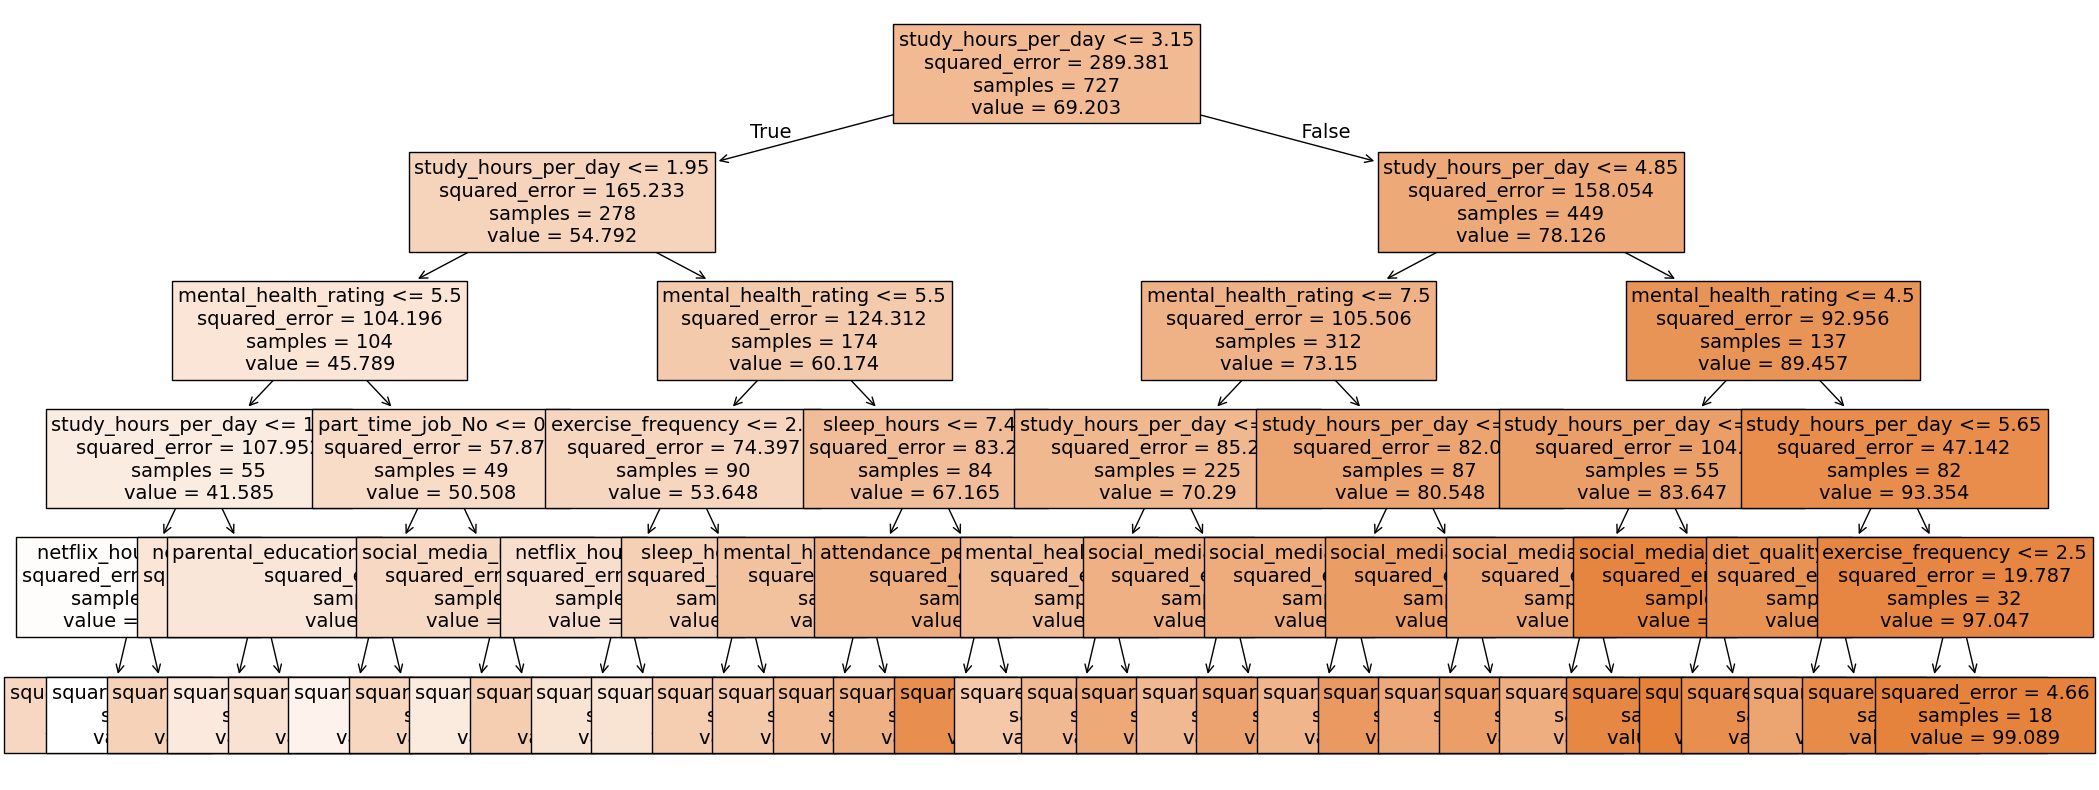

In [ ]:
#plot the tree
plt.figure(figsize=(25, 10))
plot_tree(dtree, filled=True, feature_names=encoder.get_feature_names_out().tolist(), fontsize=14);

In [ ]:
#calculate mse for training data
y_train_preds = dtree.predict(X_train_encoded)
mean_squared_error(y_train, y_train_preds)

46.451398022544275

In [ ]:
#calculate mse for testing data
y_test_preds = dtree.predict(X_test_encoded)
mean_squared_error(y_test, y_test_preds)

61.843848846742404

In [ ]:
#determine feature importance
r = permutation_importance(dtree, X_test_encoded, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = encoder.get_feature_names_out().tolist())

,0
gender_Female,0.000000
gender_Male,0.000000
gender_Other,0.000000
part_time_job_No,-0.005707
part_time_job_Yes,0.000000
diet_quality_Fair,0.000000
diet_quality_Good,0.000000
diet_quality_Poor,0.006576
parental_education_level_Bachelor,0.002145
parental_education_level_High School,0.000000


The decision tree regression model was able to capture non-linear relationships in the dataset, but it did not outperform the multiple regression model or KNN in terms of mean squared error. The MSE for the training set was 46.45, and the testing MSE was 61.84, showing a moderate level of predictive accuracy and a relatively small gap between training and testing performance, which suggests limited overfitting. After tuning the model, the best performance was observed at a tree depth of 3, as shown in the MSE versus depth graph.

The feature importance results showed that study hours per day was the most significant predictor of exam scores, followed by mental health rating. All other variables, including age, sleep hours, diet quality, extracurricular activities, and parental education, had zero measured importance in this particular model. This seems to reflects the simplicity of the tree and its focus on the most powerful splitting features. Nonetheless, these results are aligned with the other regression models suggesting that amount of time spent studying and mental health are the most contributing factors to exam performance

Random Forest Regression Model

I ran a random forest regression model to build upon the decision tree approach. Unlike a single decision tree, random forest reduces overfitting by averaging multiple trees, which improves generalization. Since earlier models like multiple regression assume linearity and decision trees can be unstable, random forest provides a more balanced and more improved way to view complex relationships in the data.

In [ ]:
#create X & y, split into training and testing data
X = df[['age','gender','study_hours_per_day','social_media_hours','netflix_hours','part_time_job','attendance_percentage','sleep_hours','diet_quality','exercise_frequency','parental_education_level','internet_quality','mental_health_rating','extracurricular_participation']]
y = df['exam_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#encode categorical column
cat_col = ['gender','part_time_job','diet_quality','parental_education_level','internet_quality','extracurricular_participation']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [ ]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])

In [ ]:
#define grid of hyperparameters for number of estimators and max depth
param_grid = {'model__n_estimators': [50, 100, 150, 200],'model__max_depth': [3, 4, 5, 6, 10]}

In [ ]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['gender',
                                                                          'part_time_job',
                                                                          'diet_quality',
                                                                          'parental_education_level',
                                                                          'internet_quality',
                                                                          'extracurricular_participation'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
#determine best parameters
grid_search.best_params_

{'model__max_depth': 10, 'model__n_estimators': 200}

In [ ]:
#use max depth of 10 & 100 estimators in model
forest = grid_search.best_estimator_

In [ ]:
#calculate mse for training data
y_train_preds = forest.predict(X_train)
mean_squared_error(y_train, y_train_preds)

6.604444490260992

In [ ]:
#calculate mse for testing data
y_test_preds = forest.predict(X_test)
mean_squared_error(y_test, y_test_preds)

32.91841948828201

In [ ]:
#determine feature importance
r = permutation_importance(forest, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
age,-0.000766
gender,0.000668
study_hours_per_day,1.265934
social_media_hours,0.040291
netflix_hours,0.028712
part_time_job,0.000057
attendance_percentage,0.005969
sleep_hours,0.036159
diet_quality,0.001505
exercise_frequency,0.025902


The random forest model had the lowest training error of all models (MSE = 6.74) and a moderate testing error (MSE = 33.77), indicating strong performance with some risk of overfitting. Study hours per day remained the most important predictor, followed by mental health rating. However, other variables such as social media usage, sleep hours, and exercise frequency also contributed meaningfully. Many categorical features, including parental education level and extracurricular participation, had minimal impact, suggesting that academic habits and well-being were more predictive of exam scores than background factors.

## Next Steps and Discussion

### Summary of Findings

In my analysis of student exam performance, all regression models constructed, multiple linear regression, k-nearest neighbors, decision tree, and random forest, performed better than the baseline predictor, which shows their usefulness in identifying patterns within the data. The models ranked by test mean squared error were from best to worse: multiple linear regression, random forest, k-nearest neighbors, and decision tree.

Key findings:

Our Best-Performing Model: Although the Random Forest Model had the lowest training error, the Multiple Linear Regression Model achieved the lowest error on the test set. This suggests that the relationships in the data were largely linear and that more complex models may have introduced some degree of overfitting.

Most Influential Variables: The most important predictors of exam scores across all models were study hours per day and mental health rating. These variables consistently showed strong associations with exam performance, highlighting the importance of academic effort and psychological well-being.

Lower-Impact Features: Other variables such as age, gender, internet quality, parental education level, and extracurricular participation had little to no predictive power in the models. This suggests that individual habits and mental health contribute more significantly to exam outcomes than demographic or contextual background, which played a minimal or no role in performance.

In summary, while non-linear models captured some variation in the data, the Multiple Linear Regression model had strong generalization which indicates that the primary relationships in this dataset are straightforward and additive. This regression analysis demonstrates that study behavior and mental wellness are key areas to target for stronger academic improvement.

### Next Steps and Improvements

To improve the accuracy of my exam score prediction models and have a more comprehensive view of student performance, I would suggest including the following features into my mode:

Course Load:
Adding data on how many classes or credit hours a student is taking would help account for overall academic pressure and time constraints that affect study habits and performance.

Assignment or Exam Weighting:
Knowing how much the target exam contributes to a student’s final grade would provide context for their effort and stress level, making score predictions more precise.

Current Academic Performance
Knowing a student's current academic performance in the class can help with understanding exam performance, such as if a student is performing strongly on prior exams and will not need to put a lot of effort into the final exam.

Use of Academic Support:
Adding information on whether a student attends tutoring, office hours, or study groups could help explain performance differences among students with similar lifestyles and behaviors.

Stress or Test Anxiety:
Expanding on the mental health variable to include measures of academic stress or test anxiety would allow the model to better account for how their exam mentality state influences outcomes.

Pre-existing Differences:
Seeing the impact of other differences, such as motivation, learning disabilities and accomodations, instructor differerences, support amongst peers, could bring insight into how other contextual factors could influence performance, and impact the modeling or explain some findings.

If we were able to incorporate these features, we would strengthen the model’s ability to predict exam scores by filling in gaps related to academic pressure, emotional state, and support systems that do play significant roles in performance, and allow us to have a more accurate model to provide greater insights for educators, parents, and even students.